<a href="https://colab.research.google.com/github/MohanPatil1/DS-And-DA-Assignments/blob/main/Ridge_Lasso_ElasticNet_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-learn==1.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 23.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
# In Built Dataset from sklearn is used
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# Loading Pre-defined Boston Dataset
boston_dataset = datasets.load_boston()
boston_dataset # It returns a dictionary

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.


{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
boston_dataset.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [5]:
# Load the data and divide into X And Y variable
boston_pd =pd.DataFrame(boston_dataset.data)
boston_pd.columns=boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price']=pd.Series(boston_pd_target)
# input
X = boston_pd.iloc[:,:-1]
# Output
Y = boston_pd.iloc[:,-1]

In [6]:
boston_pd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
x_train,x_test,y_train,y_test =train_test_split(X,Y,test_size=0.35)

In [8]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
211,0.37578,0.0,10.59,1.0,0.4890,5.404,88.6,3.6650,4.0,277.0,18.6,395.24,23.98
119,0.14476,0.0,10.01,0.0,0.5470,5.731,65.2,2.7592,6.0,432.0,17.8,391.50,13.61
388,14.33370,0.0,18.10,0.0,0.7000,4.880,100.0,1.5895,24.0,666.0,20.2,372.92,30.62
124,0.09849,0.0,25.65,0.0,0.5810,5.879,95.8,2.0063,2.0,188.0,19.1,379.38,17.58
148,2.33099,0.0,19.58,0.0,0.8710,5.186,93.8,1.5296,5.0,403.0,14.7,356.99,28.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,9.82349,0.0,18.10,0.0,0.6710,6.794,98.8,1.3580,24.0,666.0,20.2,396.90,21.24
280,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5.0,216.0,14.9,387.31,3.76
395,8.71675,0.0,18.10,0.0,0.6930,6.471,98.8,1.7257,24.0,666.0,20.2,391.98,17.12
112,0.12329,0.0,10.01,0.0,0.5470,5.913,92.9,2.3534,6.0,432.0,17.8,394.95,16.21


In [9]:
# Linear Regression model
lreg = LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression()

In [10]:
# Generate Prediction on Linear Regression model
lreg_y_pred = lreg.predict(x_test)
lreg_y_pred

array([15.23695268, 20.97377855,  6.72452674, 20.57987818, 10.11984682,
       23.30605955, 19.52138588, 39.17128956,  2.44268515, 13.45978429,
       24.66326214, 19.33995859, 35.28584434, 24.63144693, 36.10438797,
       10.55679086, 31.73742081, 12.81314552, 26.71995825, 15.63653072,
        7.72354434, 10.55292399, 19.37813293, 28.37766007, 28.51145868,
       14.7011125 , 28.60536834, 19.15173924, 21.20339637, 10.3182882 ,
       19.00479446, 21.00727452, 25.53449352, 25.47437186, 13.88740715,
       22.21928295, 14.6416842 , 19.40378158, 25.12062533, 22.30191475,
       16.04156632, 22.13838602, 17.3831032 , 16.05207778, 22.22509416,
       25.31112421, 16.68709273, 16.27750243, 27.41310579, 30.08988953,
       27.53169418, 24.12055184, 22.69983922, 37.01485676,  7.17145103,
       16.07738816, 20.59245615, 13.78610944, 20.5107594 , 17.80864717,
       35.88240058, 21.41018661, 24.46185634, 29.12232074, 21.48945972,
       25.35731726, 16.94453019, 17.93307185,  8.1818484 , 24.98

In [11]:
# Calculate Mean Squared Error
mean_squared_error = np.mean((lreg_y_pred-y_test)**2)
print('mean squared error on test set : ',mean_squared_error)

mean squared error on test set :  23.08747411586736


In [13]:
# the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["columns"]=x_train.columns
lreg_coefficient["Coefficient Estimate"]=pd.Series(lreg.coef_)
print(lreg_coefficient)

    columns  Coefficient Estimate
0      CRIM             -0.105896
1        ZN              0.042560
2     INDUS              0.012411
3      CHAS              1.443520
4       NOX            -14.507751
5        RM              3.108815
6       AGE             -0.003345
7       DIS             -1.555867
8       RAD              0.398842
9       TAX             -0.015903
10  PTRATIO             -1.031235
11        B              0.010695
12    LSTAT             -0.615491


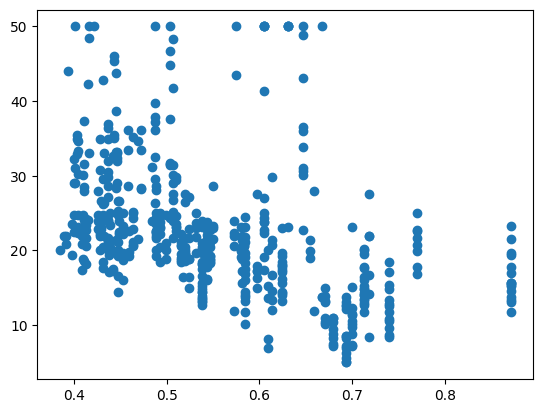

In [15]:
plt.scatter(boston_pd['NOX'],boston_pd['House Price'])
# Not So high Negative Correlation

<Axes: xlabel='Coefficient Estimate', ylabel='columns'>

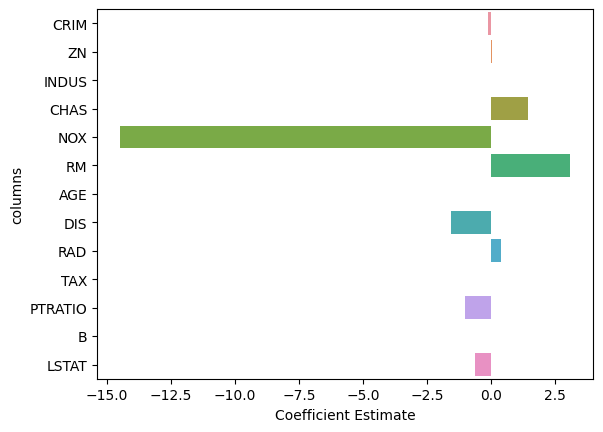

In [20]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate', y ='columns', data=lreg_coefficient)

In [23]:
# Import Ridge regression
from sklearn.linear_model import Ridge

# Train the Model
ridgeR = Ridge(alpha=2)
ridgeR.fit(x_train,y_train)
y_pred = ridgeR.predict(x_test)

In [25]:
# Calculate Mean square error
mean_squared_error_ridge =np.mean((y_pred-y_test)**2)
print(mean_squared_error_ridge)

24.163203976507962


In [27]:
# get ridge coefficient and print
ridge_coefficient = pd.DataFrame()
ridge_coefficient['Columns']=x_train.columns
ridge_coefficient['Linear Coeff.Estimate']= pd.Series(lreg.coef_)
ridge_coefficient['Ridge Coeff.Estimate']= pd.Series(ridgeR.coef_)
print(ridge_coefficient)

    Columns  Linear Coeff.Estimate  Ridge Coeff.Estimate
0      CRIM              -0.105896             -0.101227
1        ZN               0.042560              0.044590
2     INDUS               0.012411             -0.037392
3      CHAS               1.443520              1.167035
4       NOX             -14.507751             -4.867197
5        RM               3.108815              3.134352
6       AGE              -0.003345             -0.010379
7       DIS              -1.555867             -1.422813
8       RAD               0.398842              0.387917
9       TAX              -0.015903             -0.017069
10  PTRATIO              -1.031235             -0.925030
11        B               0.010695              0.011420
12    LSTAT              -0.615491             -0.633156


# Import Lasso Regression 

In [28]:
from sklearn.linear_model import Lasso

# Train the Model
lasso = Lasso(alpha=0.05)
lasso.fit(x_train,y_train)
y_pred_lasso =lasso.predict(x_test)

In [29]:
# Calculate Mean squared error
mean_squared_error_lasso=np.mean((y_pred_lasso-y_test)**2)
print('Mean Squared error on test set :',mean_squared_error_lasso)

Mean Squared error on test set : 25.310291167652455


In [30]:
# get lasso coefficient and print
lasso_coefficient = pd.DataFrame()
lasso_coefficient['Columns']=x_train.columns
lasso_coefficient['Lasso Coeff.Estimate']= pd.Series(lasso.coef_)
print(lasso_coefficient)

    Columns  Lasso Coeff.Estimate
0      CRIM             -0.097715
1        ZN              0.044920
2     INDUS             -0.049872
3      CHAS              0.312323
4       NOX             -0.000000
5        RM              3.113872
6       AGE             -0.011820
7       DIS             -1.323877
8       RAD              0.383864
9       TAX             -0.017937
10  PTRATIO             -0.877851
11        B              0.011776
12    LSTAT             -0.651475


In [33]:
# import model 
from sklearn.linear_model import ElasticNet

# Train the model
e_net = ElasticNet(alpha=0.01,l1_ratio=.3)
e_net.fit(x_train,y_train)
y_pred_elastic=e_net.predict(x_test)


In [34]:
# Calculate Mean Squared error
mean_squared_error = ((y_pred_elastic-y_test)**2)
print('mean squared error on test set :',mean_squared_error)

mean squared error on test set : 211    27.533537
119     1.996127
388    12.505285
124     1.273660
148    37.195464
         ...    
377    42.193179
280    50.066971
395    60.094275
112     1.312662
158    23.454289
Name: House Price, Length: 178, dtype: float64


In [38]:
# get Elasticnet coefficient and print
e_net_coeff = pd.DataFrame()
e_net_coeff['Columns']=x_train.columns
e_net_coeff['Elasticnet Coeff.Estimate']= pd.Series(e_net.coef_)
e_net_coeff

,Columns,Elasticnet Coeff.Estimate
0,CRIM,-0.100769
1,ZN,0.044717
2,INDUS,-0.040458
3,CHAS,1.092445
4,NOX,-4.126265
5,RM,3.123978
6,AGE,-0.010703
7,DIS,-1.410157
8,RAD,0.387477
9,TAX,-0.017189
